<a href="https://colab.research.google.com/github/kyunghyunHan/deep_learning/blob/main/src/pytoch/pytoch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

 - 인공뉴런은 입력값과 가중치,편향을 이용해 출력값을 내는 수학적 모델
 - 단층인공신경망은 퍼셉트론을 하나만 사용
 - 다층 인공신경망은 퍼셉트론을 여러개
 - 가중치는 입력의중요도 편향은 활성화의 경계가 원점으로부터 얼마나 이동할지
 - 손실함수는 정답과 신경망의 예측의 차이를 나타내는 함수
 - 경사하강법은 손실을 가중치에 대해 미분한 다음 기울기의 반대방향으로 학습률만큼 이동
 - 오차역전파는 올바른 가중치를 갖기 위해 오차를 출력층으로부터 입력층까지 전파하는 방식

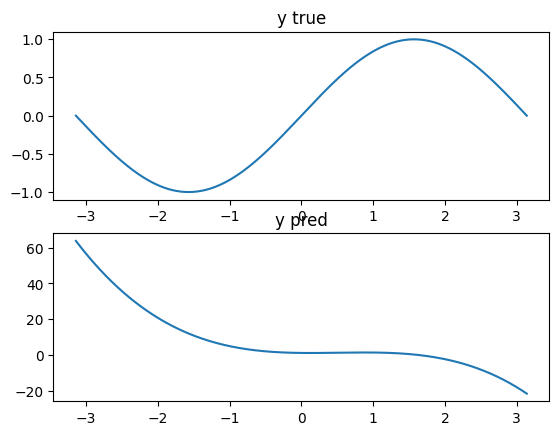

In [5]:
import math
import torch
import matplotlib.pyplot as plt

x= torch.linspace(-math.pi,math.pi,1000)

y= torch.sin(x)

a= torch.randn(())
b= torch.randn(())
c= torch.randn(())
d= torch.randn(())

y_random= a*x**3 +b*x**2+c*x+d

plt.subplot(2,1,1)
plt.title("y true")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("y pred")
plt.plot(x,y_random)

plt.show()

epoch1 loss:21.072948455810547
epoch101 loss:18.13738441467285
epoch201 loss:15.722616195678711
epoch301 loss:13.735748291015625
epoch401 loss:12.10047721862793
epoch501 loss:10.754249572753906
epoch601 loss:9.645676612854004
epoch701 loss:8.732553482055664
epoch801 loss:7.980222702026367
epoch901 loss:7.3601508140563965
epoch1001 loss:6.848991870880127
epoch1101 loss:6.427511692047119
epoch1201 loss:6.079858303070068
epoch1301 loss:5.793011665344238
epoch1401 loss:5.556277275085449
epoch1501 loss:5.360842227935791
epoch1601 loss:5.199460029602051
epoch1701 loss:5.066148281097412
epoch1801 loss:4.955997943878174
epoch1901 loss:4.864959239959717


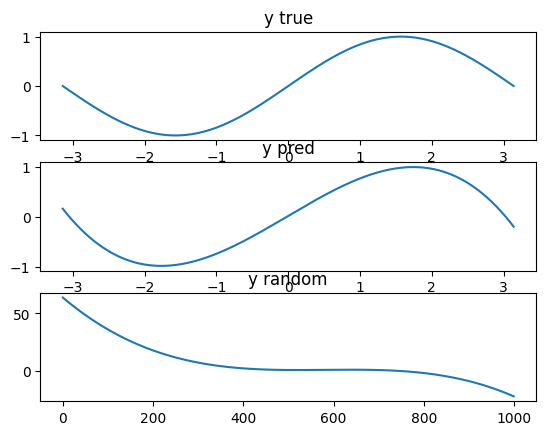

In [18]:
learning_rate = 1e-6
# 학습 2,000번 진행
for epoch in range(2000):
  y_pred = a*x**3 +b*x**2+c*x+d
  loss = (y_pred -y).pow(2).sum().item() #손실 정의
  if epoch % 100 ==0:
    print(f"epoch{epoch+1} loss:{loss}")
  grad_y_pred=2.0 * (y_pred -y)# 기울기의 미분값
  grad_a= (grad_y_pred *  x**3).sum()
  grad_b= (grad_y_pred *  x**2).sum()
  grad_c= (grad_y_pred *  x).sum()
  grad_d= (grad_y_pred).sum()

  a-=learning_rate * grad_a # 가중치 없데이트
  b-=learning_rate * grad_b # 가중치 없데이트
  c-=learning_rate * grad_c # 가중치 없데이트
  d-=learning_rate * grad_d # 가중치 없데이트


plt.subplot(3,1,1)
plt.title("y true")
plt.plot(x,y)

plt.subplot(3,1,2)
plt.title("y pred")
plt.plot(x,y_pred)
plt.subplot(3,1,3)
plt.plot(y_random)
plt.title("y random")
plt.show()


In [88]:
#보스턴 집값

import torch
import torch.nn as nn
import pandas as pd
from torch.optim.adam import Adam
from sklearn import datasets
import numpy as np

# df, y = datasets.fetch_openml('boston', return_X_y=True)
# df['target'] = y
# df.fillna(0)
# df
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/HousingData.csv")
df.fillna(0, inplace=True)

model = nn.Sequential(
    nn.Linear(13,100),
    nn.ReLU(),
    nn.Linear(100,1)
)

X= df.iloc[:,:13].values#정답을 제외한 특징을 x에 입력
Y= df['MEDV'].values#데이터프레임의 target값을 출력


# X=np.vstack(X).astype(np.float)
# Y=np.vstack(Y).astype(np.float)
batch_size =100
learning_rate=0.001

#가중치를 수정하는최적화 함수 정의
optim= Adam(model.parameters(),lr=learning_rate)
for epoch in range(200):
  for i in range(len(X) // batch_size):
    start = i * batch_size
    end = start + batch_size

    x = torch.FloatTensor(X[start:end])
    y = torch.FloatTensor(Y[start:end])
    # x = torch.from_numpy(X[start:end])
    # y = torch.from_numpy(Y[start:end])

    # 가중치의 기울기 0으로 초기화
    optim.zero_grad()

    # 예측값 계산
    preds = model(x)

    # loss 계산
    loss = nn.MSELoss()(preds, y)

    # 오차 역전파
    loss.backward()

    # 최적화 진행
    optim.step()

  if epoch % 20 == 0:
    print(f"epoch {epoch} // loss : {loss}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0 // loss : 65.9634780883789
epoch 20 // loss : 45.233070373535156
epoch 40 // loss : 41.204715728759766
epoch 60 // loss : 40.500709533691406
epoch 80 // loss : 39.473121643066406
epoch 100 // loss : 39.202640533447266
epoch 120 // loss : 39.12736129760742
epoch 140 // loss : 38.93425369262695
epoch 160 // loss : 38.79521179199219
epoch 180 // loss : 38.62700271606445


In [90]:
#모델 성능 평가
prediction = model(torch.FloatTensor(X[0,:13]))
real = Y[0]
print(f'pred:{prediction.item()}real:{real}' )

pred:25.961990356445312real:24.0
